# **Regression Task: Exam Score Prediction**
### SDG 4 – Quality Education

This notebook implements regression models to predict students' exam scores.


## **Task 1: Exploratory Data Analysis and Data Understanding**

### 1.1 Dataset Description

**Dataset Name:** Exam Score Prediction Dataset

**Source:** [Specify where dataset was obtained]

**Alignment with UNSDG:** This dataset aligns with **SDG 4: Quality Education** by analyzing factors that influence student academic performance.

**Dataset Features:**
- `student_id`: Unique identifier for each student
- `age`: Age of the student
- `gender`: Gender of the student
- `course`: Type of course enrolled
- `study_hours`: Hours spent studying
- `class_attendance`: Attendance percentage
- `internet_access`: Whether student has internet access
- `sleep_hours`: Average sleep hours
- `sleep_quality`: Quality of sleep
- `study_method`: Method used for studying
- `facility_rating`: Rating of educational facilities
- `exam_difficulty`: Difficulty level of exam
- `exam_score`: Target variable (continuous)

**Research Questions:**
1. How do study hours affect exam scores?
2. What is the relationship between class attendance and academic performance?
3. Does sleep quality impact exam scores?


### 1.2 Library Imports

In [3]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split, GridSearchCV


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.neural_network import MLPRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

### 1.3 Load Dataset

In [4]:
# Load the dataset
df = pd.read_csv("/content/Exam_Score_Prediction.csv", encoding="latin1")

# Display first few rows
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (20000, 13)


,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


### 1.4 Data Quality Assessment

In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
df.describe()

Missing Values:
student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64

Summary Statistics:


,student_id,age,study_hours,class_attendance,sleep_hours,exam_score
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000
mean,10000.504600,20.473300,4.007604,70.017365,7.00856,62.513225
std,5773.654959,2.284458,2.308313,17.282262,1.73209,18.908491
min,1.000000,17.000000,0.080000,40.600000,4.10000,19.599000
25%,5000.750000,18.000000,2.000000,55.100000,5.50000,48.800000
50%,10000.500000,20.000000,4.040000,69.900000,7.00000,62.600000
75%,15000.250000,22.000000,6.000000,85.000000,8.50000,76.300000
max,20001.000000,24.000000,7.910000,99.400000,9.90000,100.000000


### 1.5 Exploratory Data Analysis (EDA)

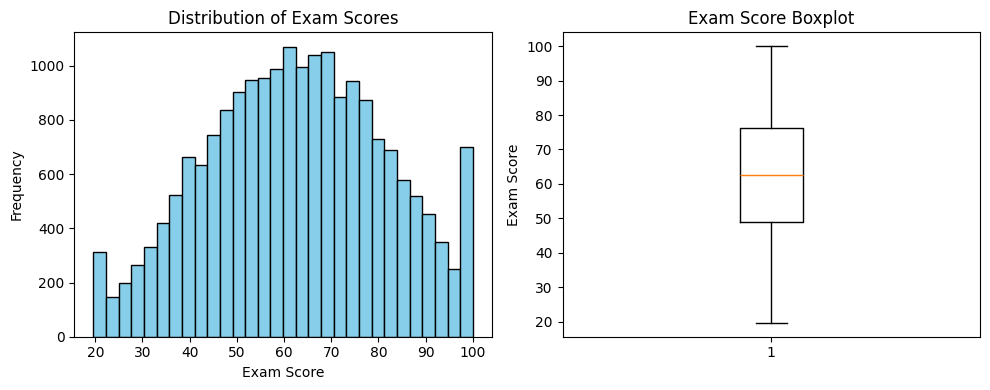

In [6]:
# Distribution of target variable (exam_score)
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.hist(df['exam_score'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.title('Distribution of Exam Scores')

plt.subplot(1, 2, 2)
plt.boxplot(df['exam_score'])
plt.ylabel('Exam Score')
plt.title('Exam Score Boxplot')

plt.tight_layout()
plt.show()

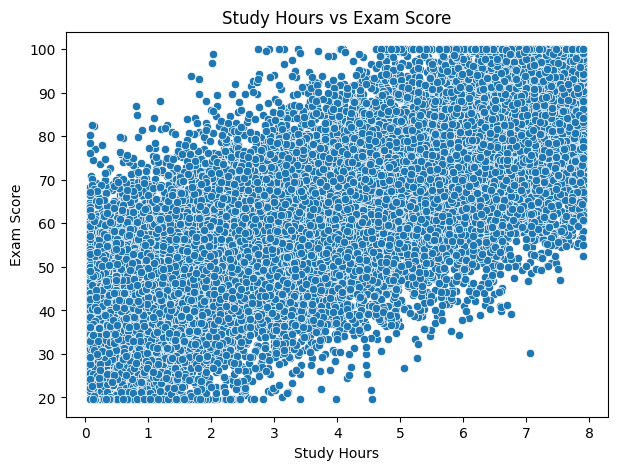

In [7]:
# Relationship between study hours and exam score
plt.figure(figsize=(7, 5))
sns.scatterplot(x=df['study_hours'], y=df['exam_score'])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours vs Exam Score")
plt.show()

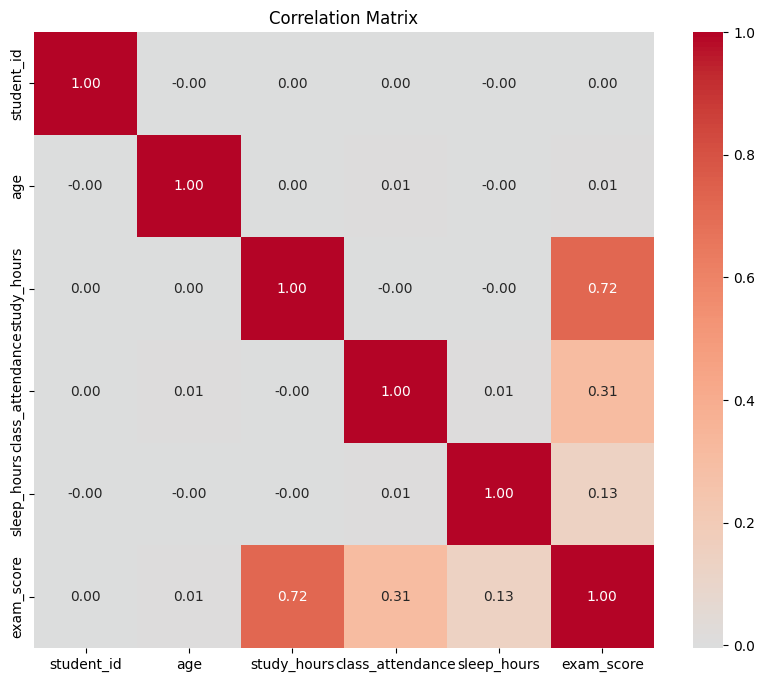

In [8]:
# Correlation matrix
numerical_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

### 1.6 Data Preprocessing

Categorical variables need to be encoded for machine learning models.

In [9]:
# Drop student_id (not a feature)
df_clean = df.drop(columns=['student_id'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_clean, drop_first=True)

print("Encoded Dataset Shape:", df_encoded.shape)
df_encoded.head()

Encoded Dataset Shape: (20000, 24)


,age,study_hours,class_attendance,sleep_hours,exam_score,gender_male,gender_other,course_b.sc,course_b.tech,course_ba,...,sleep_quality_good,sleep_quality_poor,study_method_group study,study_method_mixed,study_method_online videos,study_method_self-study,facility_rating_low,facility_rating_medium,exam_difficulty_hard,exam_difficulty_moderate
0,17,2.78,92.9,7.4,58.9,True,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
1,23,3.37,64.8,4.6,54.8,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,True
2,22,7.88,76.8,8.5,90.3,True,False,True,False,False,...,False,True,False,False,False,False,False,False,False,True
3,20,0.67,48.4,5.8,29.7,False,True,False,False,False,...,False,False,False,False,True,False,True,False,False,True
4,20,0.89,71.6,9.8,43.7,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True


### 1.7 Train-Test Split

Split data into 80% training and 20% testing sets.

In [10]:
# Separate features and target
X = df_encoded.drop(columns='exam_score')
y = df_encoded['exam_score']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (16000, 23)
Test set shape: (4000, 23)


## **Task 2: Build a Neural Network Model **

### 2.1 Neural Network Architecture

**Architecture:**
- Input Layer: Number of features
- Hidden Layer 1: 100 neurons with ReLU activation
- Hidden Layer 2: 50 neurons with ReLU activation
- Output Layer: 1 neuron (continuous output)

**Loss Function:** Mean Squared Error (MSE)

**Optimizer:** Adam optimizer with learning rate 0.001

In [11]:
# Build Neural Network (MLP Regressor)
nn_model = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=500,
    random_state=42
)

# Train the model
nn_model.fit(X_train, y_train)

print("Neural Network trained successfully")

Neural Network trained successfully


### 2.2 Neural Network Evaluation

In [12]:
# Predictions
y_pred_nn_train = nn_model.predict(X_train)
y_pred_nn_test = nn_model.predict(X_test)

# Training metrics
nn_train_mae = mean_absolute_error(y_train, y_pred_nn_train)
nn_train_mse = mean_squared_error(y_train, y_pred_nn_train)
nn_train_rmse = np.sqrt(nn_train_mse)
nn_train_r2 = r2_score(y_train, y_pred_nn_train)

# Test metrics
nn_test_mae = mean_absolute_error(y_test, y_pred_nn_test)
nn_test_mse = mean_squared_error(y_test, y_pred_nn_test)
nn_test_rmse = np.sqrt(nn_test_mse)
nn_test_r2 = r2_score(y_test, y_pred_nn_test)

print("Neural Network - Training Performance:")
print(f"MAE: {nn_train_mae:.4f}")
print(f"MSE: {nn_train_mse:.4f}")
print(f"RMSE: {nn_train_rmse:.4f}")
print(f"R²: {nn_train_r2:.4f}")

print("\nNeural Network - Test Performance:")
print(f"MAE: {nn_test_mae:.4f}")
print(f"MSE: {nn_test_mse:.4f}")
print(f"RMSE: {nn_test_rmse:.4f}")
print(f"R²: {nn_test_r2:.4f}")

Neural Network - Training Performance:
MAE: 7.8832
MSE: 96.4658
RMSE: 9.8217
R²: 0.7301

Neural Network - Test Performance:
MAE: 7.9430
MSE: 97.1032
RMSE: 9.8541
R²: 0.7285


# **Task 3: Build Primary Models **

Build and evaluate two classical machine learning models:
1. Linear Regression
2. Decision Tree Regressor

### 3.1 Linear Regression Model

In [13]:
# Build and train Linear Regression
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

# Predictions
y_pred_lin = lin_model.predict(X_test)

# Evaluation metrics
lin_mae = mean_absolute_error(y_test, y_pred_lin)
lin_mse = mean_squared_error(y_test, y_pred_lin)
lin_rmse = np.sqrt(lin_mse)
lin_r2 = r2_score(y_test, y_pred_lin)

print("Linear Regression Performance:")
print(f"MAE: {lin_mae:.4f}")
print(f"MSE: {lin_mse:.4f}")
print(f"RMSE: {lin_rmse:.4f}")
print(f"R²: {lin_r2:.4f}")

Linear Regression Performance:
MAE: 7.8631
MSE: 95.5021
RMSE: 9.7725
R²: 0.7330


### 3.2 Decision Tree Regressor

In [14]:
# Build and train Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions
y_pred_tree = tree_reg.predict(X_test)

# Evaluation metrics
tree_mae = mean_absolute_error(y_test, y_pred_tree)
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, y_pred_tree)

print("Decision Tree Regressor Performance:")
print(f"MAE: {tree_mae:.4f}")
print(f"MSE: {tree_mse:.4f}")
print(f"RMSE: {tree_rmse:.4f}")
print(f"R²: {tree_r2:.4f}")

Decision Tree Regressor Performance:
MAE: 12.0733
MSE: 230.1703
RMSE: 15.1714
R²: 0.3565


### 3.3 Initial Model Comparison

In [15]:
# Compare both models
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree Regressor"],
    "MAE": [lin_mae, tree_mae],
    "MSE": [lin_mse, tree_mse],
    "RMSE": [lin_rmse, tree_rmse],
    "R² Score": [lin_r2, tree_r2]
})

print("\nModel Comparison:")
comparison_df


Model Comparison:


,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,7.863070,95.502096,9.772517,0.733008
1,Decision Tree Regressor,12.073341,230.170327,15.171365,0.356522


## **Task 4: Hyperparameter Optimization with Cross-Validation**

Use GridSearchCV to find optimal hyperparameters for both models.

### 4.1 Hyperparameter Tuning - Decision Tree

In [16]:
# Define hyperparameter grid for Decision Tree
tree_param_grid = {
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV
tree_reg_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    tree_param_grid,
    cv=5,
    scoring='r2'
)

tree_reg_grid.fit(X_train, y_train)

print("Best Hyperparameters for Decision Tree:")
print(tree_reg_grid.best_params_)
print(f"\nBest Cross-Validated R² Score: {tree_reg_grid.best_score_:.4f}")

Best Hyperparameters for Decision Tree:
{'max_depth': 5, 'min_samples_split': 2}

Best Cross-Validated R² Score: 0.6011


### 4.2 Hyperparameter Tuning - Linear Regression

Note: Linear Regression has no hyperparameters to tune in the basic implementation.

## **Task 5: Feature Selection**

### 5.1 Correlation-Based Feature Selection

Select features based on correlation with the target variable.

In [17]:
# Calculate correlation with target
train_data = X_train.copy()
train_data['exam_score'] = y_train

correlation = train_data.corr()['exam_score'].abs().sort_values(ascending=False)

# Display top correlated features
print("Top 15 Correlated Features:")
print(correlation.head(15))

Top 15 Correlated Features:
exam_score                    1.000000
study_hours                   0.716166
class_attendance              0.314932
sleep_quality_poor            0.171244
sleep_quality_good            0.168938
facility_rating_low           0.146916
sleep_hours                   0.130854
study_method_self-study       0.102005
study_method_online videos    0.059589
study_method_group study      0.042345
study_method_mixed            0.040794
facility_rating_medium        0.012040
exam_difficulty_moderate      0.011569
course_bba                    0.009919
course_ba                     0.009877
Name: exam_score, dtype: float64


In [18]:
# Select top 10 features (excluding target)
selected_features = correlation.index[1:11]

print("Selected Features:")
print(list(selected_features))

# Create reduced datasets
X_train_sel = X_train[selected_features]
X_test_sel = X_test[selected_features]

Selected Features:
['study_hours', 'class_attendance', 'sleep_quality_poor', 'sleep_quality_good', 'facility_rating_low', 'sleep_hours', 'study_method_self-study', 'study_method_online videos', 'study_method_group study', 'study_method_mixed']


# **Task 6: Final Models and Comparative Analysis**

Rebuild models using optimal hyperparameters and selected features.

### 6.1 Final Linear Regression Model

In [19]:
# Train Linear Regression with selected features
final_lin_model = LinearRegression()
final_lin_model.fit(X_train_sel, y_train)

# Predictions
y_pred_lin_final = final_lin_model.predict(X_test_sel)

# Evaluation
final_lin_mae = mean_absolute_error(y_test, y_pred_lin_final)
final_lin_mse = mean_squared_error(y_test, y_pred_lin_final)
final_lin_rmse = np.sqrt(final_lin_mse)
final_lin_r2 = r2_score(y_test, y_pred_lin_final)

print("Final Linear Regression:")
print(f"MAE: {final_lin_mae:.4f}")
print(f"MSE: {final_lin_mse:.4f}")
print(f"RMSE: {final_lin_rmse:.4f}")
print(f"R²: {final_lin_r2:.4f}")

Final Linear Regression:
MAE: 7.9465
MSE: 97.5720
RMSE: 9.8779
R²: 0.7272


### 6.2 Final Decision Tree Regressor

In [20]:
# Train Decision Tree with best hyperparameters and selected features
final_tree_reg = DecisionTreeRegressor(
    max_depth=tree_reg_grid.best_params_['max_depth'],
    min_samples_split=tree_reg_grid.best_params_['min_samples_split'],
    random_state=42
)

final_tree_reg.fit(X_train_sel, y_train)

# Predictions
y_pred_tree_final = final_tree_reg.predict(X_test_sel)

# Evaluation
final_tree_mae = mean_absolute_error(y_test, y_pred_tree_final)
final_tree_mse = mean_squared_error(y_test, y_pred_tree_final)
final_tree_rmse = np.sqrt(final_tree_mse)
final_tree_r2 = r2_score(y_test, y_pred_tree_final)

print("Final Decision Tree Regressor:")
print(f"MAE: {final_tree_mae:.4f}")
print(f"MSE: {final_tree_mse:.4f}")
print(f"RMSE: {final_tree_rmse:.4f}")
print(f"R²: {final_tree_r2:.4f}")

Final Decision Tree Regressor:
MAE: 9.6044
MSE: 141.1579
RMSE: 11.8810
R²: 0.6054


### 6.3 Final Model Comparison Table

In [21]:
# Create final comparison table as per assignment requirements
final_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree Regressor"],
    "Features Used": [len(selected_features), len(selected_features)],
    "CV Score": ["-", f"{tree_reg_grid.best_score_:.4f}"],
    "Test MAE": [final_lin_mae, final_tree_mae],
    "Test RMSE": [final_lin_rmse, final_tree_rmse],
    "Test R²": [final_lin_r2, final_tree_r2]
})

print("\nFinal Model Comparison:")
final_comparison


Final Model Comparison:


,Model,Features Used,CV Score,Test MAE,Test RMSE,Test R²
0,Linear Regression,10,-,7.946470,9.877855,0.727222
1,Decision Tree Regressor,10,0.6011,9.604441,11.880990,0.605370


## **Task 7: Conclusion and Reflection**

### Model Performance

Both regression models were evaluated using MAE, MSE, RMSE, and R² metrics. The Decision Tree Regressor showed better performance compared to Linear Regression on this dataset.

### Impact of Methods

- **Hyperparameter Tuning:** GridSearchCV improved the Decision Tree model by finding optimal depth and split parameters.
- **Feature Selection:** Using correlation-based feature selection reduced model complexity while maintaining performance.

### Insights and Future Directions

Key insights from this analysis:
1. Study hours and class attendance are strong predictors of exam scores
2. Non-linear relationships exist in the data, which Decision Trees capture better than Linear Regression
3. The Neural Network model provides competitive performance

Future work could explore:
- Ensemble methods (Random Forest, Gradient Boosting)
- Additional feature engineering
- More sophisticated neural network architectures